In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
import time
from sympy import *

## sys of equations

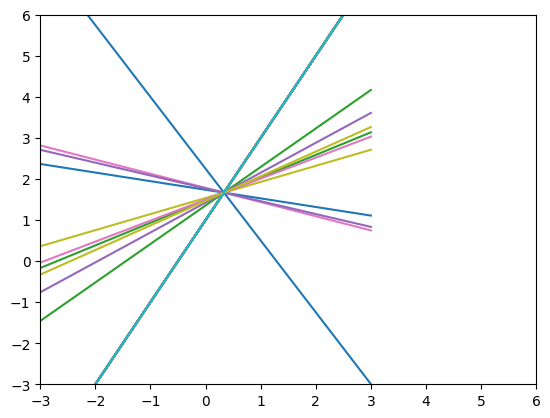

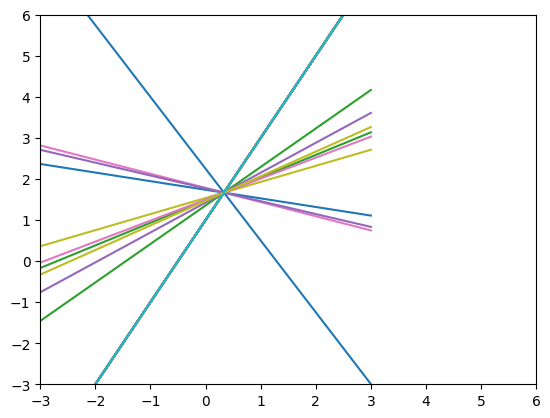

In [ ]:
# 3 these are coeff of the equation
# ay = bx + c

eq1o = [1.,2,1] #[a b c]
eq2o = [2.,1,3]

for i in range(10):
  #clear plot
  #plt.cla()

  #randomly update equations
  eq1 = np.add(eq2o, np.random.randn(1)*eq1o)
  eq2 = np.add(eq1o, np.random.randn(1)*eq1o)

  #plot new lines
  y = ([eq1[1]*-3,eq1[1]*3] + eq1[2])/eq1[0]
  plt.plot([-3,3],y)

  y = ([eq2[1]*-3,eq2[1]*3] + eq2[2])/eq2[0]
  plt.plot([-3,3],y)


  plt.axis([-3,6,-3,6])

  #pause to allow inspection
  display.clear_output(wait=True)
  display.display(plt.gcf())
  time.sleep(.1)


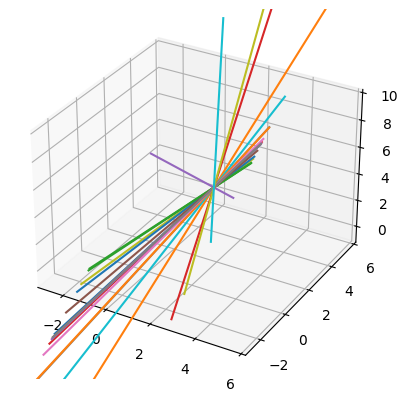

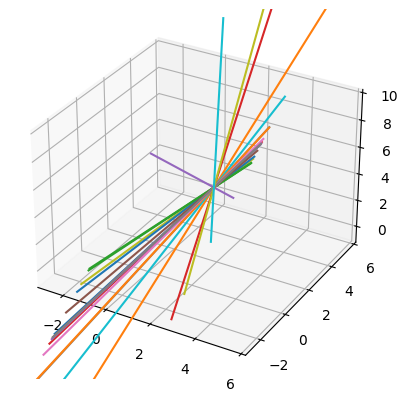

In [ ]:
# these are the coefficients of the equation:
# az = bx + cy + d
eq1o = [1, 2, 3, -1] # [a b c d]
eq2o = [2, 1, 3,  3]

# set up for 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')


for i in range(0,10):
    
#     plt.cla()
    
    # randomly update equations
    eq1 = np.add(eq2o,np.random.randn(1)*eq1o)
    eq2 = np.add(eq1o,np.random.randn(1)*eq2o)
    
    # plot new lines (solutions)
    y = ([eq1[1]*-3, eq1[1]*3] + eq1[3])/eq1[0]
    z = ([eq1[2]*-3, eq1[2]*3] + eq1[3])/eq1[0]
    ax.plot([-3,3],y,z)
    
    # plot new lines (solutions)
    y = ([eq2[1]*-3, eq2[1]*3] + eq2[3])/eq2[0]
    z = ([eq2[2]*-3, eq2[2]*3] + eq2[3])/eq2[0]
    ax.plot([-3,3],y,z)
    
    # axis limits
    ax.set_xlim3d(-3,6)
    ax.set_ylim3d(-3,6)
    ax.set_zlim3d(-1,10)
    
    # pause to allow inspection
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.1)
    
    

## Echelon Form




In [ ]:
import numpy as np

def row_echelon(A):
    """ Return Row Echelon Form of matrix A """

    # if matrix A has no columns or rows,
    # it is already in REF, so we return itself
    r, c = A.shape
    if r == 0 or c == 0:
        return A

    # we search for non-zero element in the first column
    for i in range(len(A)):
        if A[i,0] != 0:
            break
    else:
        # if all elements in the first column is zero,
        # we perform REF on matrix from second column
        B = row_echelon(A[:,1:])
        # and then add the first zero-column back
        return np.hstack([A[:,:1], B])

    # if non-zero element happens not in the first row,
    # we switch rows
    if i > 0:
        ith_row = A[i].copy()
        A[i] = A[0]
        A[0] = ith_row

    # we divide first row by first element in it
    A[0] = A[0] / A[0,0]
    # we subtract all subsequent rows with first row (it has 1 now as first element)
    # multiplied by the corresponding element in the first column
    A[1:] -= A[0] * A[1:,0:1]

    # we perform REF on matrix from second row, from second column
    B = row_echelon(A[1:,1:])

    # we add first row and first (zero) column, and return
    return np.vstack([A[:1], np.hstack([A[1:,:1], B]) ])

A = np.array([[4, 7, 3, 8],
              [8, 3, 8, 7],
              [2, 9, 5, 3]], dtype='float')

row_echelon(A)

array([[ 1.        ,  1.75      ,  0.75      ,  2.        ],
       [ 0.        ,  1.        , -0.18181818,  0.81818182],
       [ 0.        ,  0.        ,  1.        , -1.22222222]])

## Reduced Row Echelon Form

In [ ]:
# make some random matrix
A = Matrix(np.random.randn(4,4)) # convert numpy matrix to sympy matrix
B = Matrix(np.random.randn(4,3))

# compute rref
rrefA = A.rref()
rrefB = B.rref()

#print
print(rrefA)
print(rrefB)




(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]]), (0, 1, 2, 3))
(Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1],
[0, 0, 0]]), (0, 1, 2))


In [ ]:
from numpy import *

def rref(mat,precision=0,GJ=False):
    m,n = mat.shape
    p,t = precision, 1e-1**precision
    A = around(mat.astype(float).copy(),decimals=p )
    if GJ:
        A = hstack((A,identity(n)))
    pcol = -1 #pivot colum
    for i in range(m):
        pcol += 1
        if pcol >= n : break
        #pivot index
        pid = argmax( abs(A[i:,pcol]) )
        #Row exchange
        A[i,:],A[pid+i,:] = A[pid+i,:].copy(),A[i,:].copy()
        #pivot with given precision
        while pcol < n and abs(A[i,pcol]) < t:
            pcol += 1
            if pcol >= n : break
            #pivot index
            pid = argmax( abs(A[i:,pcol]) )
            #Row exchange
            A[i,:],A[pid+i,:] = A[pid+i,:].copy(),A[i,:].copy()
        if pcol >= n : break
        pivot = float(A[i,pcol])
        for j in range(m):
            if j == i: continue
            mul = float(A[j,pcol])/pivot
            A[j,:] = around(A[j,:] - A[i,:]*mul,decimals=p)
        A[i,:] /= pivot
        A[i,:] = around(A[i,:],decimals=p)
        
    if GJ:
        return A[:,:n].copy(),A[:,n:].copy()
    else:
        return A   



In [ ]:
# test
A = array([[1,2,3],[4,5,6],[-7,8,9]])
R = rref(A,precision=6)
print("A:\n",A)
print("R:\n",R)

A:
 [[ 1  2  3]
 [ 4  5  6]
 [-7  8  9]]
R:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
A = array([
    [2,2,4, 4],
    [3,1,6, 2],
    [5,3,10,6]])
R = rref(A,precision=2)
print("A:\n",A)
print("R:\n",R)

A:
 [[ 2  2  4  4]
 [ 3  1  6  2]
 [ 5  3 10  6]]
R:
 [[ 1.  0.  2.  0.]
 [-0.  1. -0.  2.]
 [ 0.  0.  0.  0.]]


### code challenge: RREF with diff size and ranks

In [ ]:
#RREF of different matrices (random)
#-square
#-rectangular(tall,wide)
#-linear dependencies(columns,rows)

m = 5
n = 5
A = Matrix(np.random.randint(1,11,(m,n))) # 5x5 , 8x3 , A.T, 



#A[:,-1] = A[:,-2] #linear dependent in column  banako # 5x5 matrix ma rank =4 or pivots = 4
A[1,:] = 2*A[2,:] + 5*A[4,:] # linear dependent in rows banako



#compute rref
rrefA = A.rref()
print("R:",np.array(rrefA[0]))



# find rank of original matrix
B = np.array(A) # convert "matrix" object to "numpy array" with object data type
print("our numpy array has %s. Thus, we have to change it to float64 for rank calculation" %(B.dtype))
B = B.astype(np.float64) #convert numpy array with "object data type" to "float datatype" 
print("B:",B)
print("Rank: ",np.linalg.matrix_rank(B))


R: [[1 0 0 0 207/32]
 [0 1 0 0 -157/32]
 [0 0 1 0 -9/32]
 [0 0 0 1 -61/32]
 [0 0 0 0 0]]
our numpy array has object. Thus, we have to change it to float64 for rank calculation
B: [[ 7.  7.  4.  2.  6.]
 [34. 31. 53. 22. 11.]
 [ 7.  8.  4.  1.  3.]
 [ 6.  5.  2.  3.  8.]
 [ 4.  3.  9.  4.  1.]]
Rank:  4
